# Project: Predictive Modeling for Agriculture

## Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

## Project Instructions
Build a multi-class Logistic Regression model to predict categories of "crop" with a F1 score of more than 0.5.

1. Read in soil_measures.csv as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.
2. Split the data into training and test sets, setting test_size equal to 20% and using a random_state of 42.
3. Predict the "crop" type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate f1_score(). When creating the model, set max_iter to 2000 so the model can converge, and pass an appropriate string value to the multi_class keyword argument.
4. In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.
5. Once you have your final features, train and test a new Logistic Regression model called log_reg, then evaluate performance using f1_score(), saving the metric as a variable called model_performance.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

### 1. Read in soil_measures.csv as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.

In [2]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [3]:
# Check the first five rows
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [4]:
# Check the shape of the dataframe
crops.shape

(2200, 5)

In [5]:
# Determine the number of unique crops
crops['crop'].nunique()

22

In [6]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [7]:
# Verify that the data in each potential feature column is numeric
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


### 2. Split the data into training and test sets, setting test_size equal to 20% and using a random_state of 42.

In [8]:
X_train, X_test, y_train, y_true = train_test_split(
    crops[['N', 'P', 'K', 'ph']], 
    crops['crop'], 
    test_size=0.2, 
    random_state=42)

### 3. Predict the "crop" type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate f1_score(). When creating the model, set max_iter to 2000 so the model can converge, and pass an appropriate string value to the multi_class keyword argument.

In [9]:
# Define the model
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class='multinomial')

In [10]:
# Train the model for each feature
for feature in X_train.columns: 
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_true, y_pred, average='micro')
    print(f'F1-score for {feature}: {f1}')

F1-score for N: 0.15


/Users/sudipbhandari/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.18636363636363637
F1-score for K: 0.24772727272727274
F1-score for ph: 0.09772727272727273


/Users/sudipbhandari/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4. In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.

In [11]:
# Calculate correlation matrix 
crops_corr = crops[['N', 'P', 'K', 'ph']].corr()

In [15]:
# Create a matrix of ones that is the same shape as the crops_corr
one_matrix = np.ones_like(crops_corr, dtype='bool')

# Create boolean a mask that only keeps the elements above the k-th diagnonal intact.
# In this case, elements below the the bool mask are zeroed, i.e., False. 
bool_mask = np.triu(one_matrix, 1)

<AxesSubplot:>

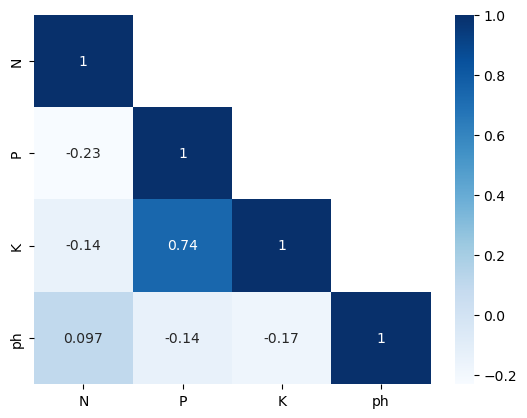

In [16]:
# Generate a heatmap of the correlation analysis, apply the mask
# Note that for sns.heatmap, passing a 'mask' means data will NOT be shown in cells where the mask is True.
sns.heatmap(crops_corr, cmap='Blues', annot=True, mask=bool_mask)

### 5. Once you have your final features, train and test a new Logistic Regression model called log_reg, then evaluate performance using f1_score(), saving the metric as a variable called model_performance.

In [17]:
# Select the final features for the model
final_features = ['N', 'K', 'ph']

In [18]:
# Train model and evaluate performance
log_reg.fit(X_train[final_features], y_train)
y_pred = log_reg.predict(X_test[final_features])
model_performance = f1_score(y_true, y_pred, average='micro')

print(model_performance)

0.575


/Users/sudipbhandari/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
